# Bank loans \- Preprocessing

Data preprocessing, also known as exploratory data analysis \(EDA\), is used to analyze data sets and summarize their main characteristics, often employing data visualization methods and statistical functions. EDA is the first step of any machine learning and predictive modeling project, specially when working with tabular datasets. This preliminary analysis is carried out before a machine learning model is built, since data quality affects the ability of a model to learn. Its goal is to explore the raw data, and get insights from it and from each variable \(feature\) by calculating frequency counts, visualizing the distributions, and calculating correlations among variables. EDA helps to identify which variables could be important in predicting the model output.

The data set contains information about its customers. It provides information about the education level of the clients, their professional experience and income, and the financial products they have.

- ID                            Customer ID
- Age                         Age
- Experience              Professional experience \(years\)
- Income                    Annual income \(thousands of dollars\)
- ZIP Code                 Home address ZIP code
- Family                     Total family members
- CCAvg                     Average spending on credit cards \(thousands of dollars\)
- Education                Education level: 1:undergraduate, 2:graduate, 3:postgraduate
- Mortgage                 House mortgage value \(thousands of dollars\)
- Personal Loan         Target variable
- Securities Account  Has a security account: 1:yes, 0:no
- CD Account             Has a CD account: 1:yes, 0:no
- Online                      Has online banking facility:  1:yes, 0:no
- CreditCard               Has a credit card issued by the bank: 1:yes. 0:no

Preprocessing the data converts raw data into prepared data.

Raw data is the data in its source form, without any prior preparation for machine learning models. Prepared data is the data set ready for a machine learning task. Prepared data does not contain null values, invalid data \(outliers\), and irrelevant features \(columns\). A prepared data set contains the target feature needed for supervised learning models. Preprocessing may also include operations to scale numerical data. For example, the education level may be mapped to values in the domain \[1, 2, 3\] to represent undergraduate education, graduate education, and postgraduate education.



In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv('bank_raw.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
transpose = df.describe()
#transpose[['min','25%','50%','75%','max']]

In [9]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
#check for negative values
(df < 0).any()

ID                    False
Age                   False
Experience             True
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [12]:
# the column experince has negative values!

condition = df['Experience'] < 0

df[condition]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [ ]:
df['Experience'] = df['Experience'].abs()

In [ ]:
#checking for negative values now
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [15]:
#personal loan is the target value

total_loans = pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
total_loans.columns = ['Labels', 'Personal Loan']

total_loans

,Labels,Personal Loan
0,0,4520
1,1,480


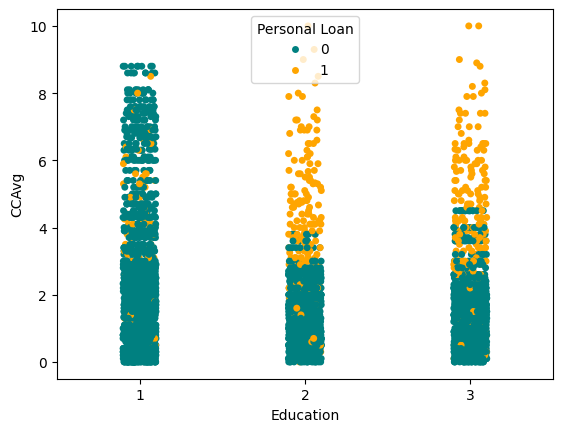

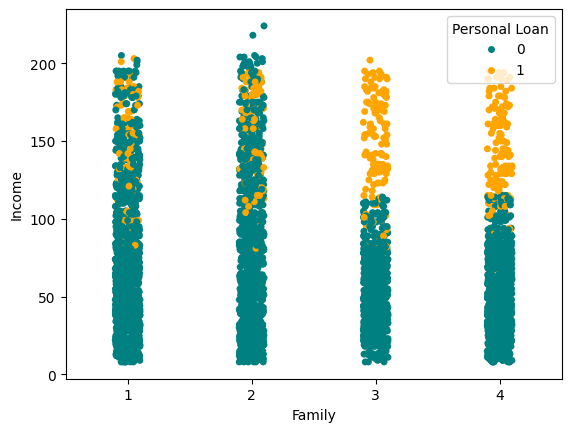

In [17]:
custom_palette = ['Teal','Orange']

sns.stripplot(x='Education', y='CCAvg', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()

sns.stripplot(x='Family', y='Income', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()

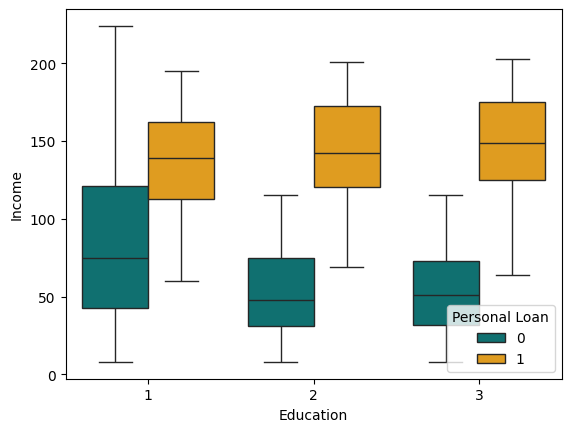

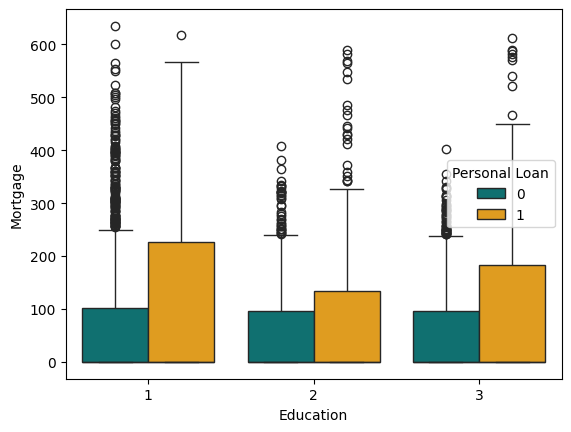

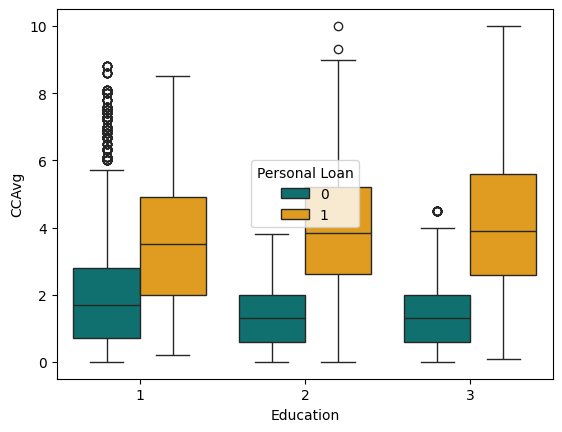

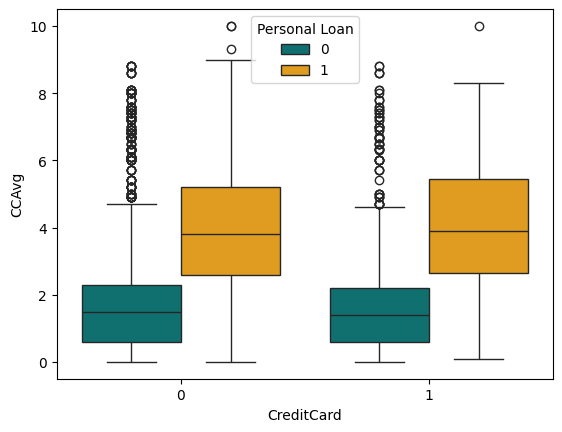

In [18]:
# a box plot shows the shape of numeric data in quartiles and its variability outside lower and upper quartiles

sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()

sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()

sns.boxplot(x='Education', y='CCAvg', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()

sns.boxplot(x='CreditCard', y='CCAvg', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()

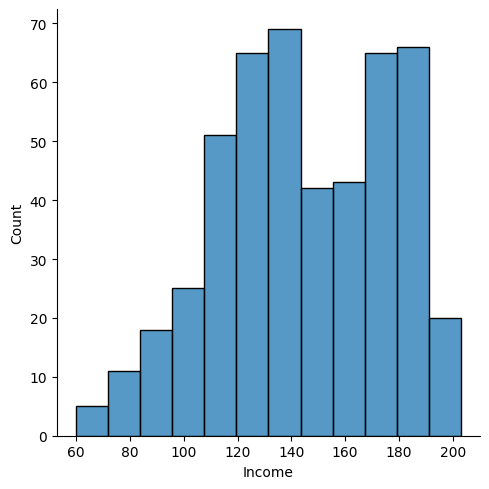

In [19]:
#customers with higher income get more personal loans

sns.displot(df[df['Personal Loan']==1]['Income'])
plt.show()

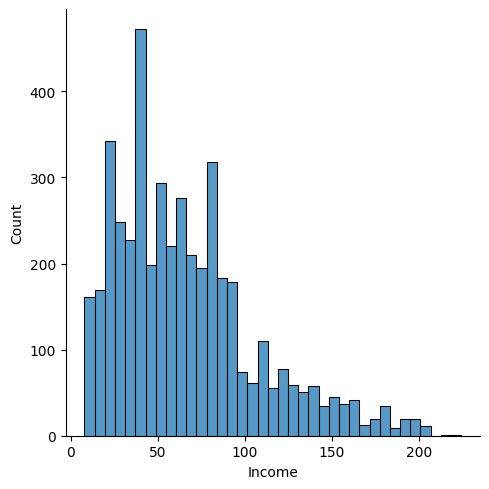

In [20]:
# cumsomers with lower income get less personal loans

sns.displot(df[df['Personal Loan']==0]['Income'])
plt.show()

In [22]:
#copy the data frame and drop the column ID and ZIP code before plotting

df2 = df.copy(deep=True)
df2.drop(['ID','ZIP Code'], axis=1, inplace=True)

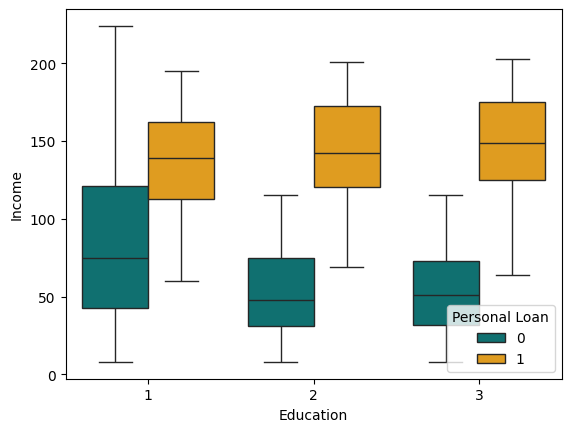

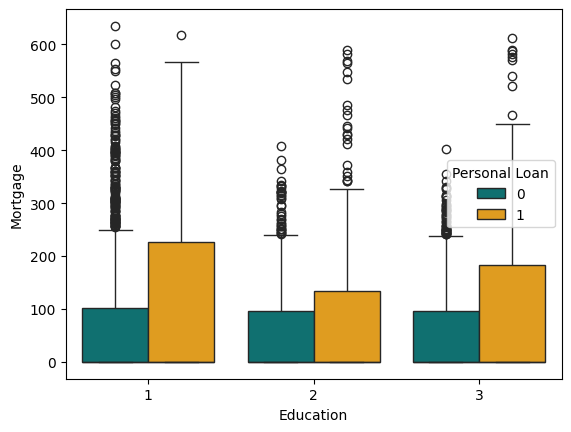

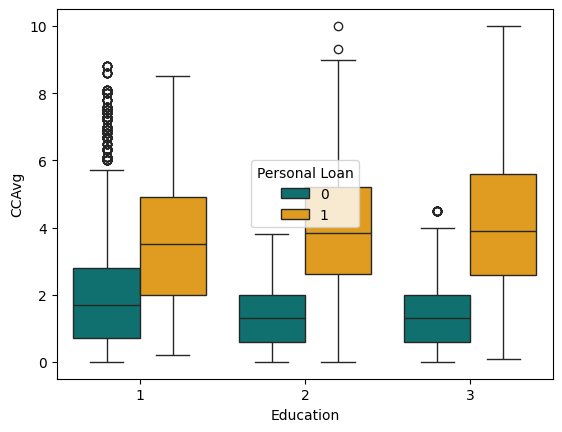

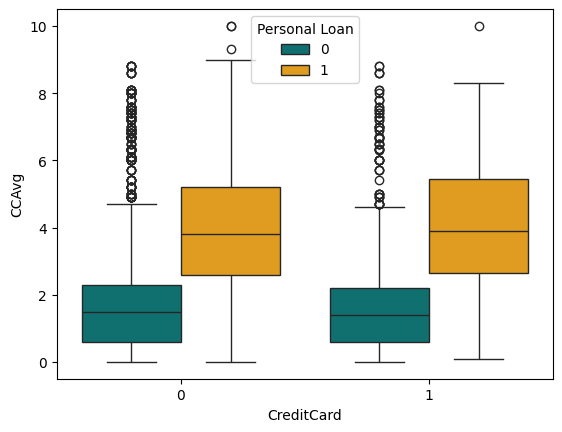

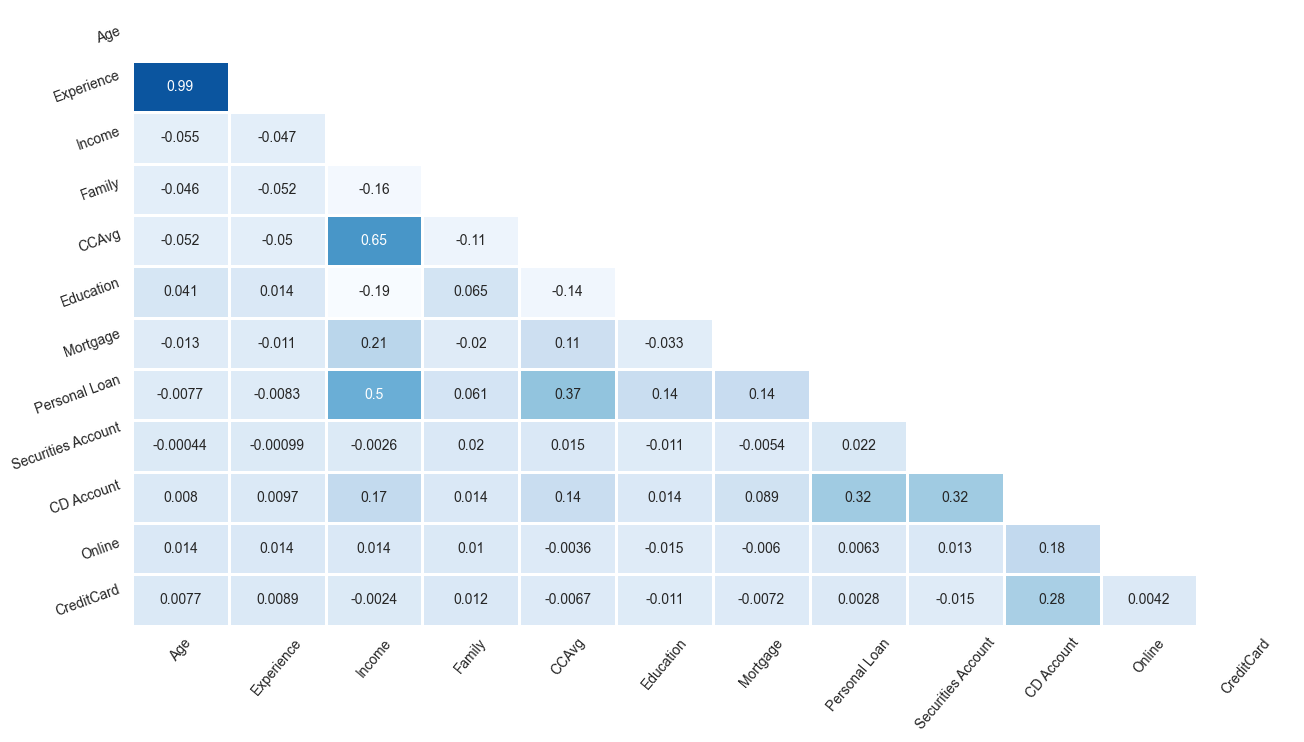

In [23]:
# a box plot shows the shape of numeric data in quartiles and its variability outside lower and upper quartiles

sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()

sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()

sns.boxplot(x='Education', y='CCAvg', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()

sns.boxplot(x='CreditCard', y='CCAvg', hue='Personal Loan', data=df, palette= custom_palette)
plt.show()



correlation = df2.corr(numeric_only=True)

# select the lower triangle of the correlation matrix and mask the upper triangle

triangle = np.tril(correlation, k=-1)
mask = triangle == 0

# plot size

plt.figure(figsize=(15,8))

# set white grid lines

sns.set_style(style = 'white')

# heat map

sns.heatmap(triangle, center=0.5, cmap='Blues', annot=True, xticklabels=correlation.index, yticklabels=correlation.columns, cbar=False, linewidths=1, mask=mask)
plt.xticks(rotation = 50)
plt.yticks(rotation = 20)
plt.show()

In [24]:
# create a new dataset: the target value Personal Loan is the last column

df3 = df[['ID', 'Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard','Personal Loan'
]]

df3.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,1,0


In [25]:
df3.to_csv('bank.csv', index=False)